In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import re



In [128]:
df = pd.read_csv('report', sep=r' \| ', engine='python')
df

,algo,arch,scale,query,time,relation,tuple,sensitivity,all_table_tstar,time_list,test pass
0,Elastic,tpch,0.0001,q1,0.007,REGION,any,30,"[(REGION, 'any', 30), (NATION, 'any', 6), (CUS...","[0.00822138786315918, 0.006245851516723633, 0....",Unknown
1,Elastic,tpch,0.0001,q2,0.005,SUPPLIER,any,24,"[(SUPPLIER, 'any', 24), (PART, 'any', 24), (PA...","[0.007420778274536133, 0.005289316177368164, 0...",Unknown
2,Elastic,tpch,0.0001,q3,0.013,LINEITEM,any,500,"[(LINEITEM, 'any', 500), (REGION, 'any', 120),...","[0.01569986343383789, 0.012966394424438477, 0....",Unknown
3,Elastic,tpch,0.0010,q1,0.010,REGION,any,9450,"[(REGION, 'any', 9450), (NATION, 'any', 1890),...","[0.011195182800292969, 0.014096975326538086, 0...",Unknown
4,Elastic,tpch,0.0010,q2,0.008,SUPPLIER,any,3840,"[(SUPPLIER, 'any', 3840), (PART, 'any', 192), ...","[0.010561227798461914, 0.007925987243652344, 0...",Unknown
5,Elastic,tpch,0.0010,q3,0.019,SUPPLIER,any,4800000,"[(SUPPLIER, 'any', 4800000), (REGION, 'any', 1...","[0.021500825881958008, 0.01859903335571289, 0....",Unknown
6,Elastic,tpch,0.0100,q1,0.041,REGION,any,80640,"[(REGION, 'any', 80640), (NATION, 'any', 16128...","[0.042917728424072266, 0.04175734519958496, 0....",Unknown
7,Elastic,tpch,0.0100,q2,0.042,SUPPLIER,any,4080,"[(SUPPLIER, 'any', 4080), (PART, 'any', 204), ...","[0.06340503692626953, 0.040616750717163086, 0....",Unknown
8,Elastic,tpch,0.0100,q3,0.077,REGION,any,120350000,"[(REGION, 'any', 120350000), (SUPPLIER, 'any',...","[0.08086252212524414, 0.07639765739440918, 0.0...",Unknown
9,Elastic,tpch,0.1000,q1,0.610,REGION,any,797580,"[(REGION, 'any', 797580), (NATION, 'any', 1595...","[0.7748715877532959, 0.5935425758361816, 0.594...",Unknown


In [153]:
time_df = pd.read_csv('report_query', sep=r' \| ', engine='python')
time_df['algo'] = 'query'
time_df = time_df.rename(columns={'avg_time': 'time'})
time_df

,arch,scale,query,toal_cnt,time,time_list,test_pass,algo
0,tpch,0.0001,q1,6,0.050,"[0.05872154235839844, 0.05359673500061035, 0.0...",Unknown,query
1,tpch,0.0010,q1,6005,0.051,"[0.05915498733520508, 0.051607370376586914, 0....",Unknown,query
2,tpch,0.0100,q1,60175,0.081,"[0.08838224411010742, 0.08065319061279297, 0.0...",Unknown,query
3,tpch,0.1000,q1,600572,0.654,"[0.7968418598175049, 0.6426174640655518, 0.635...",Unknown,query
4,tpch,1.0000,q1,6001215,7.386,"[7.889779567718506, 7.269739866256714, 7.17078...",Unknown,query
5,tpch,2.0000,q1,11997996,14.895,"[15.880366802215576, 14.846934080123901, 14.81...",Unknown,query
6,tpch,10.0000,q1,59986052,80.761,"[85.36833620071411, 82.27346134185791, 79.3412...",Unknown,query
7,tpch,0.0001,q2,24,0.038,"[0.06905269622802734, 0.03442263603210449, 0.0...",Unknown,query
8,tpch,0.0010,q2,8447,0.044,"[0.10156941413879395, 0.042497873306274414, 0....",Unknown,query
9,tpch,0.0100,q2,60175,0.075,"[0.15401053428649902, 0.06815695762634277, 0.0...",Unknown,query


In [198]:
big_df = pd.concat([df, time_df])
big_df

/home/yuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,algo,all_table_tstar,arch,query,relation,scale,sensitivity,test pass,test_pass,time,time_list,toal_cnt,tuple
0,Elastic,"[(REGION, 'any', 30), (NATION, 'any', 6), (CUS...",tpch,q1,REGION,0.0001,3.000000e+01,Unknown,NaN,0.007,"[0.00822138786315918, 0.006245851516723633, 0....",NaN,any
1,Elastic,"[(SUPPLIER, 'any', 24), (PART, 'any', 24), (PA...",tpch,q2,SUPPLIER,0.0001,2.400000e+01,Unknown,NaN,0.005,"[0.007420778274536133, 0.005289316177368164, 0...",NaN,any
2,Elastic,"[(LINEITEM, 'any', 500), (REGION, 'any', 120),...",tpch,q3,LINEITEM,0.0001,5.000000e+02,Unknown,NaN,0.013,"[0.01569986343383789, 0.012966394424438477, 0....",NaN,any
3,Elastic,"[(REGION, 'any', 9450), (NATION, 'any', 1890),...",tpch,q1,REGION,0.0010,9.450000e+03,Unknown,NaN,0.010,"[0.011195182800292969, 0.014096975326538086, 0...",NaN,any
4,Elastic,"[(SUPPLIER, 'any', 3840), (PART, 'any', 192), ...",tpch,q2,SUPPLIER,0.0010,3.840000e+03,Unknown,NaN,0.008,"[0.010561227798461914, 0.007925987243652344, 0...",NaN,any
5,Elastic,"[(SUPPLIER, 'any', 4800000), (REGION, 'any', 1...",tpch,q3,SUPPLIER,0.0010,4.800000e+06,Unknown,NaN,0.019,"[0.021500825881958008, 0.01859903335571289, 0....",NaN,any
6,Elastic,"[(REGION, 'any', 80640), (NATION, 'any', 16128...",tpch,q1,REGION,0.0100,8.064000e+04,Unknown,NaN,0.041,"[0.042917728424072266, 0.04175734519958496, 0....",NaN,any
7,Elastic,"[(SUPPLIER, 'any', 4080), (PART, 'any', 204), ...",tpch,q2,SUPPLIER,0.0100,4.080000e+03,Unknown,NaN,0.042,"[0.06340503692626953, 0.040616750717163086, 0....",NaN,any
8,Elastic,"[(REGION, 'any', 120350000), (SUPPLIER, 'any',...",tpch,q3,REGION,0.0100,1.203500e+08,Unknown,NaN,0.077,"[0.08086252212524414, 0.07639765739440918, 0.0...",NaN,any
9,Elastic,"[(REGION, 'any', 797580), (NATION, 'any', 1595...",tpch,q1,REGION,0.1000,7.975800e+05,Unknown,NaN,0.610,"[0.7748715877532959, 0.5935425758361816, 0.594...",NaN,any


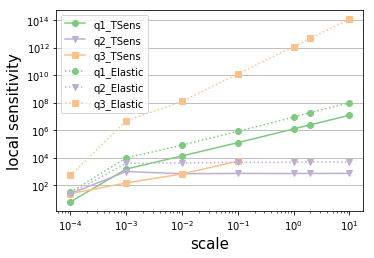

In [230]:
def _sens_change_by_n(df, q, ax, algo, color, marker):
    data = df.query('query == "{q}" & algo == "{algo}"'.format(q=q, algo=algo))
    x, y = data['scale'], data['sensitivity']
    if algo == 'TSens':
        ax.plot(x, y, linestyle='solid', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    elif algo == 'Elastic':
        ax.plot(x, y, linestyle='dotted', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    ax.legend()
    return data

def sens_change_by_n(df):
    fig, ax = plt.subplots(figsize=(5.5,3.7))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('scale', size = 15)
    ax.set_ylabel('local sensitivity', size=15)
    #ax.set_title('Local Sensitivity VS scale')
    ax.grid(which='major', axis='y')
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_n(df, 'q1', ax, 'TSens', c1, m1)
    _sens_change_by_n(df, 'q2', ax, 'TSens', c2, m2)
    _sens_change_by_n(df, 'q3', ax, 'TSens', c3, m3)
    _sens_change_by_n(df, 'q1', ax, 'Elastic', c1, m1)
    _sens_change_by_n(df, 'q2', ax, 'Elastic', c2, m2)
    _sens_change_by_n(df, 'q3', ax, 'Elastic', c3, m3)
    plt.show()
    fig.savefig('./graphs/sens_change_by_n.pdf')
    

sens_change_by_n(df)

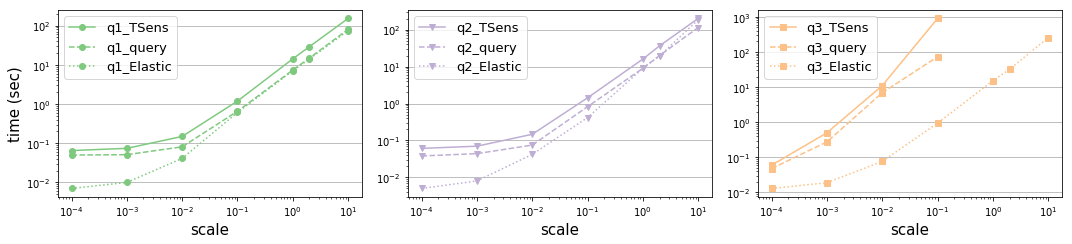

In [232]:
def _time_change_by_n(df, q, ax, algo, color, marker):
    data = df.query('query == "{q}" & algo == "{algo}"'.format(q=q, algo=algo))
    x, y = data['scale'], data['time']
    if algo == 'TSens':
        ax.plot(x, y, linestyle='solid', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    elif algo == 'Elastic':
        ax.plot(x, y, linestyle='dotted', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    elif algo == 'query':
        ax.plot(x, y, linestyle='dashed', marker=marker, color=color, label='{q}_{algo}'.format(q=q, algo=algo))
    ax.legend(prop={'size': 13})
    return data

def time_change_by_n(df, time_df):
    fig, axes = plt.subplots(1, 3, figsize=(15,3.5))
    axes[0].set_ylabel('time (sec)', size=15)
    for ax in axes:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('scale', size=15)
        #ax.set_ylabel('time (sec)', size=15)
        #ax.set_title('time VS scale')
        ax.grid(which='major', axis='y')
    ax1, ax2, ax3 = axes
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _time_change_by_n(df, 'q1', ax1, 'TSens', c1, m1)
    _time_change_by_n(df, 'q2', ax2, 'TSens', c2, m2)
    _time_change_by_n(df, 'q3', ax3, 'TSens', c3, m3)
    _time_change_by_n(time_df, 'q1', ax1, 'query', c1, m1)
    _time_change_by_n(time_df, 'q2', ax2, 'query', c2, m2)
    _time_change_by_n(time_df, 'q3', ax3, 'query', c3, m3)
    _time_change_by_n(df, 'q1', ax1, 'Elastic', c1, m1)
    _time_change_by_n(df, 'q2', ax2, 'Elastic', c2, m2)
    _time_change_by_n(df, 'q3', ax3, 'Elastic', c3, m3)
    fig.tight_layout()
    plt.show()
    
    fig.savefig('./graphs/time_change_by_n.pdf')

time_change_by_n(df, time_df)

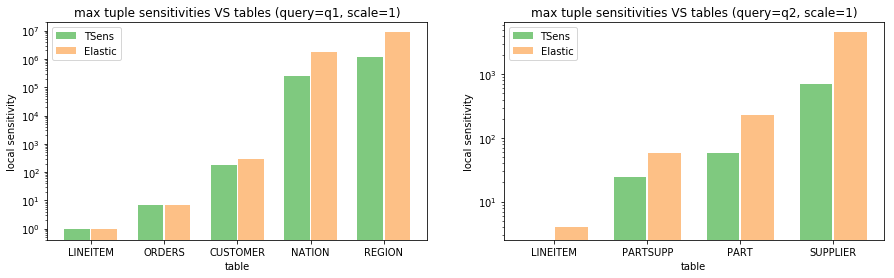

In [131]:
def fetch_data_sens_change_by_table(df, q, scale, algo, cutoff):
    data = df.query('query == "{q}" & algo == "{algo}" & scale == {scale}'.format(q=q, algo=algo, scale=scale))
    data = str(data['all_table_tstar'].tolist()[0])
    data = re.sub(r'\((\w+),', r'("\1",', data)
    data = eval(data)
    data = list(zip(*(sorted(data))))
    x, _, y = data
    x, y = list(x), list(y)
    labels, sens = x, y
    if cutoff:
        sens = [min(sen, cutoff) for sen in sens]
    return labels, sens
    
def _sens_change_by_table(ax, df, q, scale, cutoff=None):
    labels, TSens_sens = fetch_data_sens_change_by_table(df, q, scale, algo='TSens', cutoff=cutoff)
    labels, Elastic_sens = fetch_data_sens_change_by_table(df, q, scale, algo='Elastic', cutoff=cutoff)
    
    labels, TSens_sens, Elastic_sens = list(zip(*sorted(zip(labels, TSens_sens, Elastic_sens), key=lambda pair: pair[2])))
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    
    rects1 = ax.bar(x - width/2 - 0.01, TSens_sens, width, label='TSens', color=c1)
    rects2 = ax.bar(x + width/2 + 0.01, Elastic_sens, width, label='Elastic', color=c3)
                
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('max tuple sensitivities VS tables (query={q}, scale={scale})'.format(q=q, scale=scale))
    ax.legend()

def sens_change_by_table(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    axes = (ax1, ax2)
    for ax in axes:
        #ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('table')
        ax.set_ylabel('local sensitivity')

    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_table(ax1, df, 'q1','1')
    _sens_change_by_table(ax2, df, 'q2','1')
    #_sens_change_by_table(ax3, df, 'q3','0.01', cutoff=10**3)
    #_sens_change_by_table(df, 'q2', ax2, '10', 'TSens', c2)
    #_sens_change_by_table(df, 'q3', ax3, '0.01', 'TSens', c3)
    plt.show()
    fig.savefig('./graphs/sens_change_by_table.pdf')

sens_change_by_table(df)

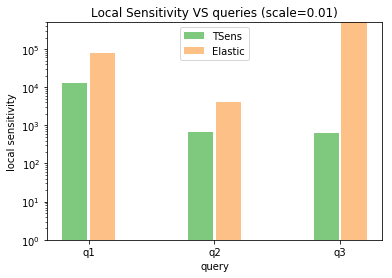

In [132]:
def fetch_data_sens_change_by_query(df, scale, algo, cutoff):
    data = df.query('algo == "{algo}" & scale == {scale}'.format(algo=algo, scale=scale))
    data = data[['query', 'sensitivity']].to_xarray()
    labels = data.query.values
    sens = data.sensitivity.values
    if cutoff:
        sens = [min(sen, cutoff) for sen in sens]
    return labels, sens
    
def _sens_change_by_query(ax, df, q, scale, cutoff=None):
    labels, TSens_sens = fetch_data_sens_change_by_query(df, scale, algo='TSens', cutoff=cutoff)
    labels, Elastic_sens = fetch_data_sens_change_by_query(df, scale, algo='Elastic', cutoff=cutoff)
    
    labels, TSens_sens, Elastic_sens = list(zip(*sorted(zip(labels, TSens_sens, Elastic_sens), key=lambda pair: pair[0])))
    
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    
    rects1 = ax.bar(x - width/2-0.01, TSens_sens, width, label='TSens', color=c1)
    rects2 = ax.bar(x + width/2+0.01, Elastic_sens, width, label='Elastic', color=c3)
                
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('Local Sensitivity VS queries (scale={scale})'.format(q=q, scale=scale))
    ax.legend()

def sens_change_by_query(df):
    fig, ax = plt.subplots()
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('query')
    ax.set_ylabel('local sensitivity')
    ax.set_ylim(1, 5*10**5)
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3 = colors[:3]
    m1, m2, m3 = ['o', 'v', 's']
    _sens_change_by_query(ax, df, 'q1','0.01')
    plt.show()
    fig.savefig('./graphs/sens_change_by_query.pdf')

sens_change_by_query(df)

In [133]:
!pip install xarray --user

You are using pip version 10.0.1, however version 19.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [134]:
!conda install xarray -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/yuchao/.conda/envs/py27

  added / updated specs: 
    - xarray


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB

The following packages will be UPDATED:

    openssl: 1.1.1d-h7b6447c_2 --> 1.1.1d-h7b6447c_3


openssl-1.1.1d       |  3.7 MB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [17]:
def get_db_histogram(scale='1'):
    import db
    conn = db.use_db('tpch', scale)
    relations = ['REGION', 'NATION', 'CUSTOMER', 'ORDERS', 'LINEITEM', 'SUPPLIER', 'PART', 'PARTSUPP']
    counts = []
    for reln_name in relations:
        sql = "SELECT COUNT(*) FROM {reln}".format(reln=reln_name)
        cur = db.run_sql(sql, conn)
        res = cur.fetchone()[0]
        counts.append(res)
    return relations, counts

relations, counts = get_db_histogram()

/home/yuchao/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


[('REGION', 5), ('NATION', 25), ('SUPPLIER', 1000), ('CUSTOMER', 15000), ('PART', 20000), ('PARTSUPP', 80000), ('ORDERS', 150000), ('LINEITEM', 600572)]
866602


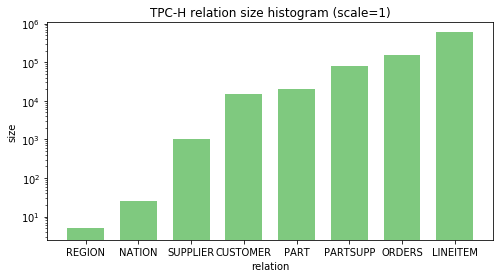

In [19]:
def db_histogram(scale='1'):
    relations, counts = get_db_histogram(scale)
    relations, counts = list(zip(*sorted(zip(relations, counts), key=lambda pair: pair[1])))
    print(list(zip(relations, counts)))
    print(np.sum(counts))
    
    cmap = cm.get_cmap('Accent')
    colors = cmap.colors
    c1, c2, c3, c4 = colors[:4]
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_yscale('log')
    ax.set_xlabel('relation')
    ax.set_ylabel('size')
    ax.set_title('TPC-H relation size histogram (scale=1)')
    ax.bar(relations, counts, color=c1, width=0.7)
    plt.show()
    fig.savefig('./graphs/db_size.pdf')

db_histogram(scale='0.1')

In [204]:
# Check the average improvement of sensitivity for q1 and q2 after scale 0.01
def get_sens_ratio(scale, query):
    elast = df.query('algo=="Elastic" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['sensitivity'].tolist()[0]
    tsens = df.query('algo=="TSens" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['sensitivity'].tolist()[0]
    ratio = np.float64(elast*1.0/tsens)
    return ratio

for query in ['q1', 'q2']:
    ratios = []
    for scale in [0.01, 0.1, 1, 10]:
        ratio = get_sens_ratio(scale, query)
        ratios.append(ratio)
    print(query, np.mean(ratios).round(0))
for query in ['q3']:
    ratios = []
    for scale in [0.0001, 0.001, 0.01, 0.1]:
        ratio = get_sens_ratio(scale, query)
        ratios.append(ratio)
    print(query, np.mean(ratios).round(0))

q1 7.0
q2 6.0
q3 604371.0


In [185]:
get_sens_ratio(0.1, 'q3').round(0)

2197885.0

In [203]:
# Check the average loss of time for q1 and q2 after scale 0.01
# Here if we say, TSens takes {ratio} time of what Elastic takes
def get_time_ratio(scale, query, algo_name):
    algo_time = big_df.query('algo=="{algo_name}" & scale == {scale} & query == "{query}"'.format(algo_name=algo_name, query=query, scale=scale))['time'].tolist()[0]
    query_time = big_df.query('algo=="query" & scale == {scale} & query == "{query}"'.format(query=query, scale=scale))['time'].tolist()[0]
    #ratio = np.float64(elast*1.0/tsens)
    ratio = np.float64(algo_time*1.0/query_time)
    return ratio

for query in ['q1', 'q2']:
    for algo_name in ['Elastic', 'TSens']:
        ratios = []
        for scale in [0.01, 0.1, 1, 2, 10]:
            ratio = get_time_ratio(scale, query, algo_name)
            ratios.append(ratio)
        print(query, algo_name, np.mean(ratios).round(3))
for query in ['q3']:
    for algo_name in ['Elastic', 'TSens']:
        ratios = []
        for scale in [0.0001, 0.001, 0.01, 0.1]:
            ratio = get_time_ratio(scale, query, algo_name)
            ratios.append(ratio)
        print(query, algo_name, np.mean(ratios).round(3))

q1 Elastic 0.853
q1 TSens 1.885
q2 Elastic 0.932
q2 TSens 1.814
q3 Elastic 0.091
q3 TSens 4.257


In [20]:
1.885 / 0.853

2.2098475967174678

In [22]:
1.814/0.932

1.946351931330472

In [193]:
get_time_ratio(0.001, 'q3').round(3)

26.421

In [188]:
high_sens = df.query('algo=="Elastic" & scale==0.01 & query=="q3"')['sensitivity'].tolist()[0]
np.format_float_scientific(np.float64(high_sens))

'1.2035e+08'

In [189]:
for query in ['q1', 'q2', 'q3']:
    ratio = get_sens_ratio(0.01, query)
    print(ratio)

6.110942709912095
6.107784431137724
186012.36476043277


In [190]:
df.query("algo=='TSens' & scale==1 & query=='q1'")['all_table_tstar'].to_xarray()

<xarray.DataArray 'all_table_tstar' (index: 1)>
array(["[(REGION, [('regionkey', 3)], 1212077), (NATION, [('regionkey', 4), ('nationkey', 6)], 246415), (CUSTOMER, [('nationkey', 8), ('custkey', 143500)], 178), (ORDERS, [('custkey', 2026), ('orderkey', 1009634)], 7), (LINEITEM, [('orderkey', 485926)], 1)]"],
      dtype=object)
Coordinates:
  * index    (index) int64 25

In [191]:
df.query("algo=='Elastic' & scale==1 & query=='q1'")['all_table_tstar'].to_xarray()

<xarray.DataArray 'all_table_tstar' (index: 1)>
array(["[(REGION, 'any', 8841035), (NATION, 'any', 1768207), (CUSTOMER, 'any', 287), (ORDERS, 'any', 7), (LINEITEM, 'any', 1)]"],
      dtype=object)
Coordinates:
  * index    (index) int64 12